# KMeans - Clustering 

K-Means Clustering Algorithm
K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science. In this topic, we will learn what is K-means clustering algorithm, how the algorithm works, along with the Python implementation of k-means clustering.

What is K-Means Algorithm?

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.
It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm

The k-means clustering algorithm mainly performs two tasks:
1. Determines the best value for K center points or centroids by an iterative process.
2. Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

Hence each cluster has datapoints with some commonalities, and it is away from other clusters.

In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Generating data

# Set a random seed for reproducibility
np.random.seed(42)

# Define the number of data points per cluster
num_samples_per_cluster = 100

# Generate data for three income and age clusters
cluster1_age = np.random.normal(25, 5, num_samples_per_cluster)
cluster1_income = np.random.normal(30000, 5000, num_samples_per_cluster)

cluster2_age = np.random.normal(40, 7, num_samples_per_cluster)
cluster2_income = np.random.normal(50000, 7000, num_samples_per_cluster)

cluster3_age = np.random.normal(60, 8, num_samples_per_cluster)
cluster3_income = np.random.normal(80000, 10000, num_samples_per_cluster)

# Combine data from all clusters
data = pd.DataFrame({
    'Age': np.concatenate([cluster1_age, cluster2_age, cluster3_age]),
    'Income': np.concatenate([cluster1_income, cluster2_income, cluster3_income])
})

In [3]:
data

,Age,Income
0,27.483571,22923.146290
1,24.308678,27896.773386
2,28.238443,28286.427417
3,32.615149,25988.613654
4,23.829233,29193.571442
...,...,...
295,64.311280,74899.836011
296,51.702031,77301.250647
297,58.477291,70212.362842
298,52.995054,75557.067399


### Plotting Scatter plot of Age vs Income before clustering

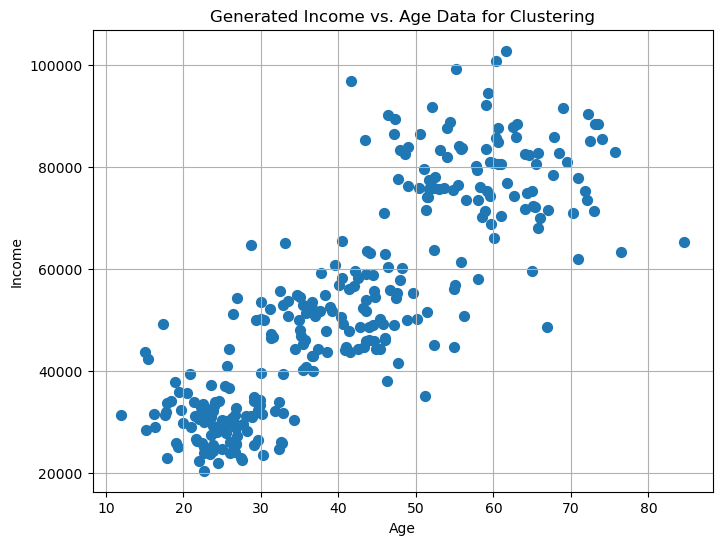

In [4]:
# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Income'], s=50)
plt.title('Generated Income vs. Age Data for Clustering')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.show()

### Training KMeans Clustering Model 

In [5]:
kmeans = KMeans(n_clusters=3,init='k-means++' )
kmeans.fit(data[['Age', 'Income']])

C:\Users\argad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\argad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

### Converting data from Unsupervised to Supervised data 

In [6]:
print('KMeans Labels shape - ',kmeans.labels_.shape)
print(kmeans.labels_)
data['Class'] = kmeans.labels_   # Storing kmeans.labels_ values into dataset by name 'Class'

KMeans Labels shape -  (300,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [7]:
data.head()

,Age,Income,Class
0,27.483571,22923.146290,0
1,24.308678,27896.773386,0
2,28.238443,28286.427417,0
3,32.615149,25988.613654,0
4,23.829233,29193.571442,0


### Plotting Scatter plot of Age vs Income after clustering 

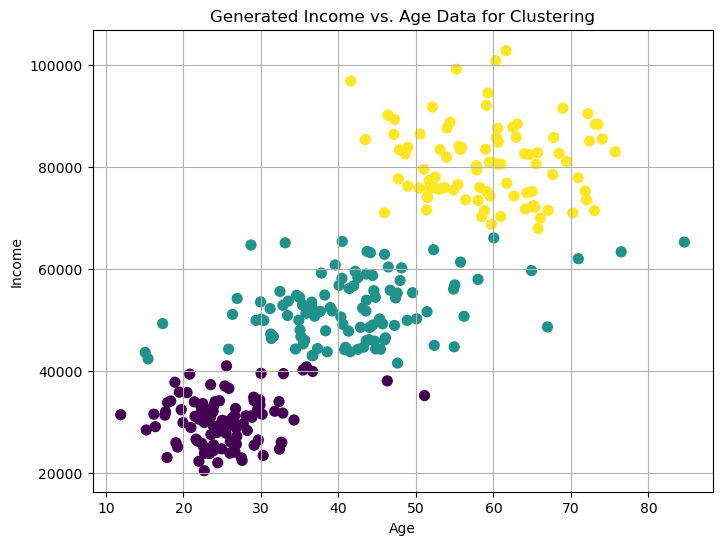

In [8]:
# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Income'], s=50, c = kmeans.labels_)
plt.title('Generated Income vs. Age Data for Clustering')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.show()

### Plotting Cluster Centers

In [9]:
kmeans.cluster_centers_

array([[2.54656003e+01, 3.02829666e+04],
       [4.19333024e+01, 5.21913348e+04],
       [5.93208929e+01, 8.07446267e+04]])

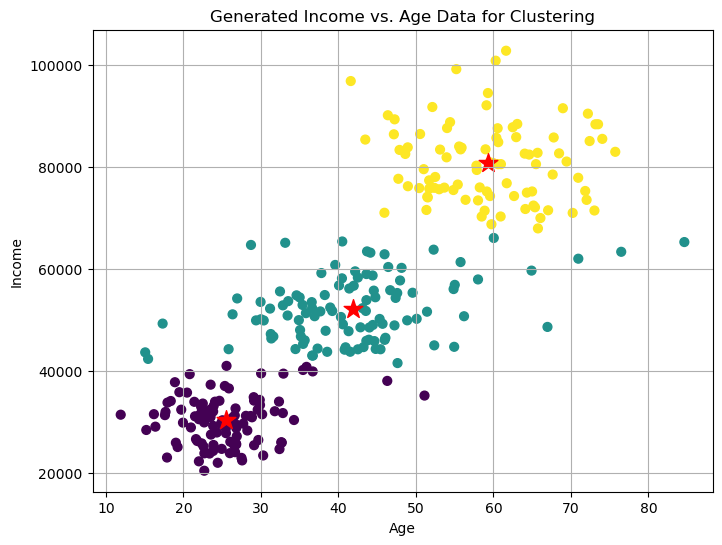

In [10]:
# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Income'], s=40, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = 'r', marker='*', s=200, label='Centroids')
plt.title('Generated Income vs. Age Data for Clustering')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.show()

### Checking models silhouette_score

In [11]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data[['Age','Income']], kmeans.labels_)
print(f'Silhouette_score of KMeans Model is - {score:.2f}' )

Silhouette_score of KMeans Model is - 0.67
